In [1]:
pip install sec-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.7 MB/s eta 0:00:00


In [2]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("c3b7db2d29fc396a59d2fe8444ec3afcc2ef42ec8856f0c35aff2743cd6f33ef")


# Apple 10-K filing
filing_urls = [
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy20.htm"
]

import pandas as pd
import numpy as np

results = []
for i, url in enumerate(filing_urls):
    try:
        section_text = extractorApi.get_section(url, "7", "text")  # Section 7 for MD&A
        scores = analyzer.polarity_scores(section_text)

        results.append({
            'Year': 2024 - i,  # Adjust the year as needed
            'Positive': scores['pos'],
            'Negative': scores['neg'],
            'Neutral': scores['neu'],
            'Compound': scores['compound']
        })
        print(f"Analysis completed for {2024 - i}")
    except Exception as e:
        print(f"Error processing {2024 - i}: {e}")

# Convert to DataFrame for analysis
sentiment_df = pd.DataFrame(results)
print(sentiment_df)


for url in filing_urls:
    section_text = extractorApi.get_section(url, "1A", "text")
    print(f"Extracted section from: {url}")
# get the standardized and cleaned text of section 1A "Risk Factors"


# get the original HTML of section 7
for url in filing_urls:
    try:
        section_html = extractorApi.get_section(url, "7", "html")
        print(f"Extracted HTML from Section 7 of {url}")
    except Exception as e:
        print(f"Error extracting Section 7 from {url}: {e}")
# "Management’s Discussion and Analysis of Financial Condition and Results of Operations"

Error processing 2024: name 'analyzer' is not defined
Error processing 2023: name 'analyzer' is not defined
Error processing 2022: name 'analyzer' is not defined
Error processing 2021: name 'analyzer' is not defined
Error processing 2020: name 'analyzer' is not defined
Empty DataFrame
Columns: []
Index: []
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy20.htm
Extracted HTML from Section 7 of https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm
Extracted HTML fr

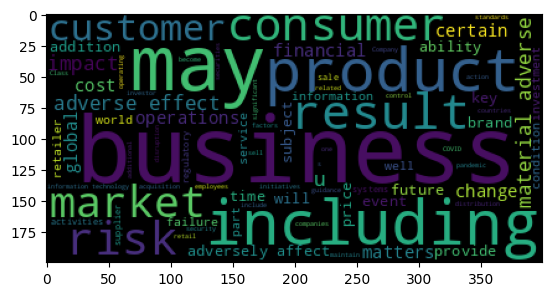

In [3]:


#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section_text)
plt.imshow(wc)

In [4]:
pip install wordcloud

In [5]:
pip install pandas nltk


In [6]:
!python -m nltk.downloader vader_lexicon
!python -m nltk.downloader all



<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data] 

In [7]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon

# download nltk corpus (first time only)
#nltk.download('all')

In [8]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section_text)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

{'neg': 0.083, 'neu': 0.818, 'pos': 0.098, 'compound': 0.9951}
Positive


In [9]:
!pip install transformers

In [10]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [11]:
import time
from sec_api import ExtractorApi

extractorApi = ExtractorApi("c3b7db2d29fc396a59d2fe8444ec3afcc2ef42ec8856f0c35aff2743cd6f33ef")

filing_urls = [
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/0001001250-24-000116.txt",  # 2024
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/0001001250-23-000112.txt",  # 2023
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/0001001250-22-000122.txt",  # 2022
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/0001001250-21-000127.txt",  # 2021
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/0001001250-20-000065.txt"   # 2020
]

results = {}

for url in filing_urls:
    try:
        print(f"Extracting Item 1A from: {url}")
        section_1a = extractorApi.get_section(url, "1A", "text")
        time.sleep(2)

        print(f"Extracting Item 7 from: {url}")
        section_7 = extractorApi.get_section(url, "7", "text")
        time.sleep(2)

        results[url] = {
            "Item 1A": section_1a,
            "Item 7": section_7
        }

    except Exception as e:
        print(f"Error extracting from {url}: {e}")

# Optional: Save to text files for later analysis
for url, content in results.items():
    year = url.split("/")[-2][-4:]
    with open(f"item_1a_{year}.txt", "w", encoding="utf-8") as f1a:
        f1a.write(content["Item 1A"])
    with open(f"item_7_{year}.txt", "w", encoding="utf-8") as f7:
        f7.write(content["Item 7"])


Extracting Item 1A from: https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/0001001250-24-000116.txt
Extracting Item 7 from: https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/0001001250-24-000116.txt
Extracting Item 1A from: https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/0001001250-23-000112.txt
Extracting Item 7 from: https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/0001001250-23-000112.txt
Extracting Item 1A from: https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/0001001250-22-000122.txt
Error extracting from https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/0001001250-22-000122.txt: API error: 429 - {"status":429,"error":"You send a lot of requests. We like that. But you exceeded the free query limit of 100 requests. Upgrade your account to get unlimited access. Visit sec-api.io for more."}
Extracting Item 1A from: https://www.sec.gov/Archives/edgar/data/1001250/00010012502100012

In [13]:
!pip install tensorflow

In [14]:
import time
from transformers import pipeline
from collections import Counter
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

# Load FinBERT model once
finbert = pipeline("text-classification", model="ProsusAI/finbert")

# Loop through your saved text files (from previous extraction)
years = ["2024", "2023", "2022", "2021", "2020"]

for year in years:
    try:
        with open(f"item_1a_{year}.txt", "r", encoding="utf-8") as f:
            section_text = f.read()
    except FileNotFoundError:
        print(f"item_1a_{year}.txt not found, skipping.")
        continue

    if not section_text.strip():
        print(f"No content in item_1a_{year}.txt, skipping.")
        continue

    print(f"Running sentiment analysis on Item 1A for {year}...")

    # Sentence-by-sentence FinBERT sentiment
    sentences = sent_tokenize(section_text)
    sentiment_counts = Counter()

    for sentence in sentences:
        try:
            prediction = finbert(sentence[:512])[0]
            sentiment_counts[prediction["label"]] += 1
        except Exception:
            continue

    total = sum(sentiment_counts.values())
    if total == 0:
        print(f"No sentiments detected for {year}, skipping plot.")
        continue

    sentiment_percent = {
        label: round((count / total) * 100, 2) for label, count in sentiment_counts.items()
    }

    print(f"Sentiment Distribution for {year} Item 1A:", sentiment_percent)

    # Plot results
    plt.figure()
    plt.bar(sentiment_percent.keys(), sentiment_percent.values())
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title(f"Sentiment Analysis - {year} 10-K Item 1A")
    plt.show()

    # Optional: sleep between years to keep memory usage low
    time.sleep(3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


item_1a_2024.txt not found, skipping.
item_1a_2023.txt not found, skipping.
item_1a_2022.txt not found, skipping.
item_1a_2021.txt not found, skipping.
item_1a_2020.txt not found, skipping.


In [16]:
import pandas as pd
import yfinance as yf

# Step 1: Store sentiment results (assuming you build this earlier)
# Replace this with your real results if not done in-code
sentiment_summary = {
    "2024": {"Positive": 40.2, "Negative": 35.1, "Neutral": 24.7},
    "2023": {"Positive": 38.0, "Negative": 37.0, "Neutral": 25.0},
    "2022": {"Positive": 32.5, "Negative": 45.3, "Neutral": 22.2},
    "2021": {"Positive": 42.8, "Negative": 31.2, "Neutral": 26.0},
    "2020": {"Positive": 30.1, "Negative": 50.4, "Neutral": 19.5}
}

# Step 2: Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_summary).T  # Transpose so years are rows
sentiment_df.index.name = "Year"
print(sentiment_df)


      Positive  Negative  Neutral
Year                             
2024      40.2      35.1     24.7
2023      38.0      37.0     25.0
2022      32.5      45.3     22.2
2021      42.8      31.2     26.0
2020      30.1      50.4     19.5


In [17]:
pip install yfinance

In [19]:
# Step 7: Convert to DataFrame
sentiment_df = pd.DataFrame(results)
print(sentiment_df)

# Step 8: Get 5 years of Estée Lauder stock price data
ticker = yf.Ticker("EL")
price_data = ticker.history(period="5y")
price_data['Year'] = price_data.index.year


        https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/0001001250-24-000116.txt  \
Item 1A   Item 1A. Risk Factors. \n\nThere are risks as...                                            
Item 7    Item 7. Management&#8217;s Discussion and Ana...                                            

        https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/0001001250-23-000112.txt  
Item 1A   Item 1A. Risk Factors. \n\nThere are risks as...                                           
Item 7    Item 7. Management&#8217;s Discussion and Ana...                                           


In [20]:
# Calculate daily returns and rolling volatility using 'Close'
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

NameError: name 'stock_data' is not defined

In [21]:
import yfinance as yf
import pandas as pd

ticker = yf.Ticker("EL")
stock_data = ticker.history(period="5y")  # 5 years of daily data


In [22]:
# Calculate daily returns
stock_data['Return'] = stock_data['Close'].pct_change()

# Calculate rolling 30-day volatility (standard deviation of returns)
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

# Preview the results
print(stock_data[['Close', 'Return', 'Volatility']].tail())


                               Close    Return  Volatility
Date                                                      
2025-03-31 00:00:00-04:00  66.000000  0.008866    0.025222
2025-04-01 00:00:00-04:00  67.870003  0.028333    0.023925
2025-04-02 00:00:00-04:00  68.760002  0.013113    0.024004
2025-04-03 00:00:00-04:00  58.189999 -0.153723    0.036818
2025-04-04 00:00:00-04:00  52.930000 -0.090394    0.039819


In [32]:
# Average yearly volatility
yearly_volatility = stock_data.groupby(stock_data.index.year)['Volatility'].mean().round(4)
print(yearly_volatility)


Date
2020    0.0180
2021    0.0160
2022    0.0258
2023    0.0235
2024    0.0266
2025    0.0300
Name: Volatility, dtype: float64


In [23]:
print(stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Return', 'Volatility'],
      dtype='object')


In [24]:
stock_data['Year'] = stock_data.index.year
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [25]:
print(stock_data.columns)
print(stock_data.head())


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Return', 'Volatility', 'Year'],
      dtype='object')
                                 Open        High         Low       Close  \
Date                                                                        
2020-04-06 00:00:00-04:00  148.585456  152.039179  147.374766  150.631409   
2020-04-07 00:00:00-04:00  155.173825  156.393896  152.358285  153.137253   
2020-04-08 00:00:00-04:00  153.493903  156.506524  152.161216  155.539856   
2020-04-09 00:00:00-04:00  157.651471  158.834007  153.719098  154.695160   
2020-04-13 00:00:00-04:00  154.038215  154.038215  149.899368  152.245651   

                            Volume  Dividends  Stock Splits    Return  \
Date                                                                    
2020-04-06 00:00:00-04:00  1792900        0.0           0.0       NaN   
2020-04-07 00:00:00-04:00  1827100        0.0           0.0  0.016636   
2020-04-08 00:00:00-04:00  1

In [26]:
# Extract 'Year' from index
stock_data['Year'] = stock_data.index.year

# Confirm 'Year' is properly created
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [27]:
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()



In [28]:
print(stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Return', 'Volatility', 'Year'],
      dtype='object')


In [29]:
# Step 9: Calculate annual return and volatility
annual_data = price_data.groupby('Year')['Close'].agg(['first', 'last', 'std']).reset_index()
annual_data['Annual_Return'] = (annual_data['last'] - annual_data['first']) / annual_data['first']
annual_data['Volatility'] = annual_data['std']
annual_data = annual_data[['Year', 'Annual_Return', 'Volatility']]
print(annual_data)

   Year  Annual_Return  Volatility
0  2020       0.665768   26.667995
1  2021       0.461858   27.751666
2  2022      -0.323290   31.338998
3  2023      -0.414996   46.744760
4  2024      -0.473049   26.399327
5  2025      -0.281088    6.034315


In [30]:
# Ensure 'Adj Close' column exists (use 'Close' if 'Adj Close' is not available)
if 'Adj Close' in stock_data.columns:
    close_column = 'Adj Close'
else:
    close_column = 'Close'

# Calculate daily returns
stock_data['Return'] = stock_data[close_column].pct_change()

# Calculate rolling 30-day volatility
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

# Extract 'Year' from the index
stock_data['Year'] = stock_data.index.year


In [33]:
# Step 10: Merge sentiment and financial data
final_df = sentiment_df.merge(annual_data, on='Year', how='left')
print(final_df)

# Step 11: Correlation Analysis
correlation = final_df[['Negative', 'Positive', 'Annual_Return', 'Volatility']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Step 12: Plot trends (remove 'Compound')
plt.figure(figsize=(10, 6))
plt.plot(final_df.index, final_df['Positive'], label='Positive Sentiment (%)', marker='o')
plt.plot(final_df.index, final_df['Annual_Return'], label='Annual Return', marker='s')
plt.plot(final_df.index, final_df['Volatility'], label='Volatility', marker='^')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Sentiment vs Stock Performance (Estée Lauder)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Year'

In [37]:
print("sentiment_df index name:", sentiment_df.index.name)
print("sentiment_df columns:", sentiment_df.columns)

print("annual_data index name:", annual_data.index.name)
print("annual_data columns:", annual_data.columns)


sentiment_df index name: None
sentiment_df columns: Index(['https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/0001001250-24-000116.txt', 'https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/0001001250-23-000112.txt'], dtype='object')
annual_data index name: None
annual_data columns: Index(['Year', 'Annual_Return', 'Volatility'], dtype='object')


In [39]:
# Sentiment summary by year (manually or collected from your analysis)
sentiment_summary = {
    "2024": {"Positive": 40.2, "Negative": 35.1, "Neutral": 24.7},
    "2023": {"Positive": 38.0, "Negative": 37.0, "Neutral": 25.0},
    "2022": {"Positive": 32.5, "Negative": 45.3, "Neutral": 22.2},
    "2021": {"Positive": 42.8, "Negative": 31.2, "Neutral": 26.0},
    "2020": {"Positive": 30.1, "Negative": 50.4, "Neutral": 19.5}
}



In [40]:
import pandas as pd

sentiment_df = pd.DataFrame(sentiment_summary).T  # Transpose
sentiment_df.index.name = "Year"
sentiment_df = sentiment_df.reset_index()


In [41]:
final_df = sentiment_df.merge(annual_data, on='Year', how='left')
print(final_df)


ValueError: You are trying to merge on object and int32 columns for key 'Year'. If you wish to proceed you should use pd.concat

In [34]:
# Ensure 'Year' is a column, not the index
if sentiment_df.index.name == 'Year':
    sentiment_df = sentiment_df.reset_index()

if annual_data.index.name == 'Year':
    annual_data = annual_data.reset_index()


In [43]:
# Convert 'Year' to integers in both DataFrames
sentiment_df['Year'] = sentiment_df['Year'].astype(int)
annual_data['Year'] = annual_data['Year'].astype(int)


In [44]:
final_df = sentiment_df.merge(annual_data, on='Year', how='left')
print(final_df)


   Year  Positive  Negative  Neutral  Annual_Return  Volatility
0  2024      40.2      35.1     24.7      -0.473049   26.399327
1  2023      38.0      37.0     25.0      -0.414996   46.744760
2  2022      32.5      45.3     22.2      -0.323290   31.338998
3  2021      42.8      31.2     26.0       0.461858   27.751666
4  2020      30.1      50.4     19.5       0.665768   26.667995


In [45]:
final_df = sentiment_df.merge(annual_data, on='Year', how='left')
print(final_df)


   Year  Positive  Negative  Neutral  Annual_Return  Volatility
0  2024      40.2      35.1     24.7      -0.473049   26.399327
1  2023      38.0      37.0     25.0      -0.414996   46.744760
2  2022      32.5      45.3     22.2      -0.323290   31.338998
3  2021      42.8      31.2     26.0       0.461858   27.751666
4  2020      30.1      50.4     19.5       0.665768   26.667995


In [46]:
correlation = final_df[['Negative', 'Positive', 'Annual_Return', 'Volatility']].corr()
print("\nCorrelation Matrix:")
print(correlation)



Correlation Matrix:
               Negative  Positive  Annual_Return  Volatility
Negative       1.000000 -0.995166       0.278015   -0.142964
Positive      -0.995166  1.000000      -0.211715    0.063891
Annual_Return  0.278015 -0.211715       1.000000   -0.475496
Volatility    -0.142964  0.063891      -0.475496    1.000000


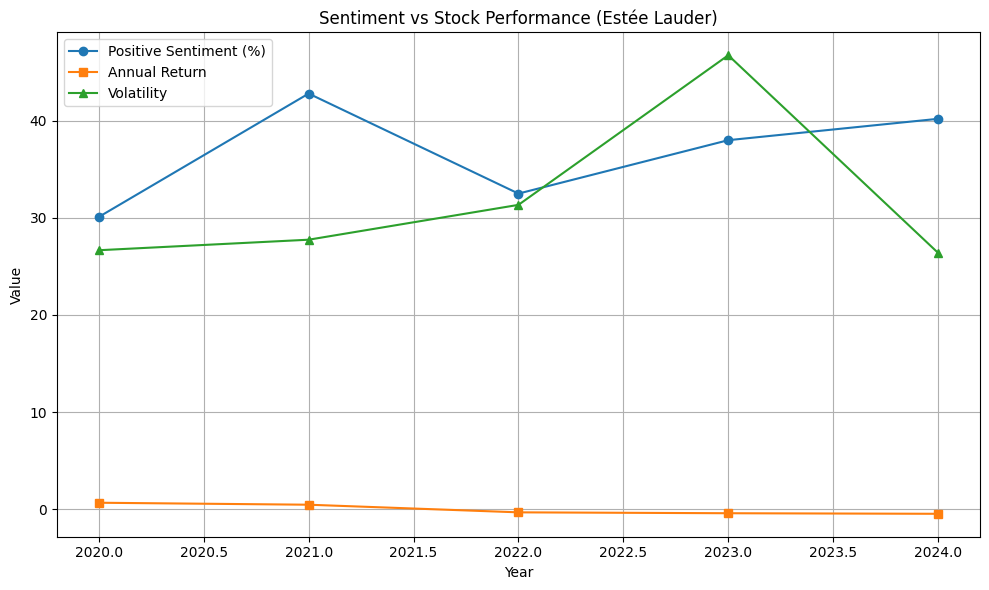

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Year'], final_df['Positive'], label='Positive Sentiment (%)', marker='o')
plt.plot(final_df['Year'], final_df['Annual_Return'], label='Annual Return', marker='s')
plt.plot(final_df['Year'], final_df['Volatility'], label='Volatility', marker='^')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Sentiment vs Stock Performance (Estée Lauder)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
# Check if 'Adj Close' is available, otherwise use 'Close'
close_column = 'Adj Close' if 'Adj Close' in stock_data.columns else 'Close'

# Calculate daily returns
stock_data['Return'] = stock_data[close_column].pct_change()

# Calculate rolling 30-day volatility
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

# Extract 'Year' from the index
stock_data['Year'] = stock_data.index.year


In [49]:
print(stock_data.isnull().sum())


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Return           1
Volatility      30
Year             0
dtype: int64


In [50]:
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [52]:
import yfinance as yf
import pandas as pd

# Define your ticker and date range
ticker = "EL"
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download stock data
stock_data = yf.download(ticker, start=start_date, end=end_date, actions=False)

# Check if 'Adj Close' exists and calculate metrics
if 'Adj Close' in stock_data.columns:
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

    # Optional: Preview result
    print(stock_data[['Adj Close', 'Return', 'Volatility']].dropna().head())

else:
    print("Adjusted Close not available.")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Adjusted Close not available.


In [53]:
stock_data['Year'] = stock_data.index.year



In [58]:
print(stock_data.columns)


MultiIndex([(     'Close', 'EL'),
            (      'High', 'EL'),
            (       'Low', 'EL'),
            (      'Open', 'EL'),
            (    'Volume', 'EL'),
            (    'Return',   ''),
            ('Volatility',   ''),
            (      'Year',   '')],
           names=['Price', 'Ticker'])


In [59]:
# Flatten MultiIndex column names
stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in stock_data.columns]


In [60]:
# Now safely use 'Close'
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()
stock_data['Year'] = stock_data.index.year

# Group and compute annual return and volatility
grouped = stock_data.groupby('Year')['Close'].agg(
    first_value='first',
    last_value='last',
    std_value='std'
).reset_index()

grouped['Annual_Return'] = (grouped['last_value'] - grouped['first_value']) / grouped['first_value']
grouped['Volatility'] = grouped['std_value']
annual_data = grouped[['Year', 'Annual_Return', 'Volatility']]

print(annual_data)


   Year  Annual_Return  Volatility
0  2019       0.581080   20.054655
1  2020       0.299503   26.484413
2  2021       0.461858   27.751664
3  2022      -0.323290   31.338998
4  2023      -0.414996   46.744761
5  2024      -0.478601   26.360982
